In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

### Task-1. Merge the sales data of 12 month into a single CSV file

#### Creating list of files in the given path

In [2]:
files_path = 'Data/'
files_list = [f for f in os.listdir(files_path)]

#### Adding all files as DataFrames to the dictionary

In [3]:
my_dict = {}
i = 0
while i < len(files_list):
    my_dict[i] = pd.read_csv(files_path + files_list[i])
    i += 1

#### Concatinating files and converting to csv

In [4]:
df = pd.concat(my_dict.values())
df.to_csv('Output/' + 'all_files.csv', index=False)

#### Read in updated DataFrame

In [5]:
df = pd.read_csv('Output/' + 'all_files.csv')

#### Cleaning up data

In [6]:
df = df.dropna(how='all')

filt = (df['Order Date'] != 'Order Date')
df = df[filt]
df[filt]

<ipython-input-6-f6f24c00d9a8>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[filt]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Converting columns to correct type

In [7]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

### Task-2. Add "Month" column

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.strftime('%B')

### Task-3. Add "Total Cost" column

In [9]:
df['Total Cost'] = df['Quantity Ordered'] * df['Price Each']

### Task-4. Add "City" Column

In [10]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

### Task-5. Add 'Time' Column

In [11]:
df['Hours'] = df['Order Date'].dt.hour

### Question-1. What was the best month for sales?

In [12]:
per_month = df.groupby('Month').sum()
per_month_sorted = per_month.sort_values(by=['Total Cost'], ascending=False)
month_name = per_month_sorted.iloc[0].name

print(f'The best month for sales: {month_name}')

The best month for sales: December


#### Analytics of Sales per each Month

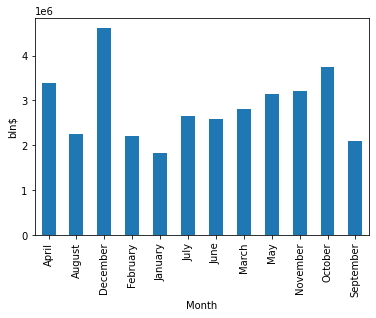

In [13]:
per_month['Total Cost'].plot.bar()
plt.ylabel('bln$')
plt.xlabel('Month')
plt.show()

### Question-2. What was the most sold product?

In [14]:
popular_product = df.groupby('Product').sum()
popular_product_sorted = popular_product.sort_values(by='Quantity Ordered', ascending=False)
product_name = popular_product_sorted.iloc[0].name

print(f'The most sold product: {product_name}')

The most sold product: AAA Batteries (4-pack)


### Question-3. What city sold the most product?

In [15]:
most_sells = df.groupby('City').sum()
most_sells_sorted = most_sells.sort_values(by='Quantity Ordered', ascending=False)
city_name = most_sells_sorted.iloc[0].name

print(f'City with highest number of sales: {city_name}')

City with highest number of sales:  San Francisco


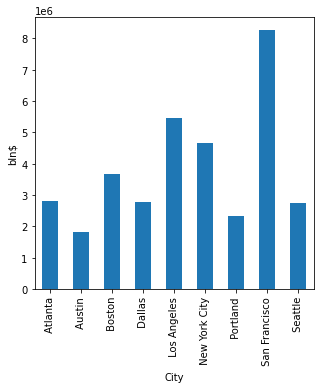

In [16]:
most_sells['Total Cost'].plot.bar(figsize=(5, 5))
plt.ylabel('bln$')
plt.xlabel('City')
plt.show()

### Question-4. What time should we display advertisements?

In [17]:
order_activity = df.groupby('Hours').sum()
order_activity_sorted = order_activity.sort_values(by='Quantity Ordered', ascending=False)
prime_time = order_activity_sorted.iloc[0].name

print(f'Prime Time for advertisement campaigns: {prime_time} o\'clock')

Prime Time for advertisement campaigns: 19 o'clock


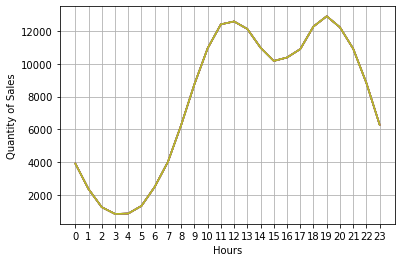

In [18]:
hours = [hour for hour,df in df.groupby('Hours')]
plt.plot(hours, df.groupby(['Hours']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Quantity of Sales')
plt.grid()
plt.show()

# 11 a.m and 7 p.m. are prime times

### Question-5. What products are most often sold together?

In [19]:
df = df[df['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))



In [20]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question-6. What product sold the most? Why do you think it sold the most?


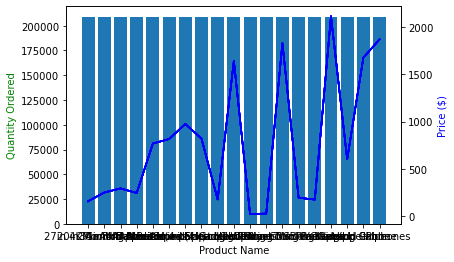

In [21]:
product_sold = df.groupby('Product').count()
fig, ax1 = plt.subplots()

products = [product for product,df in df.groupby('Product')]
ax2 = ax1.twinx()
ax1.bar(products, popular_product.sum()['Quantity Ordered'])
ax2.plot(products, product_sold, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

plt.show()